# Exercice de statistique.

Il s'agit d'un exemple sur lequel nous avait fait travailler Jean-Pierre Kahanne (1926-2017) en 1985 à Orsay (Paris 11) dans le cadre de la license de statistique.

Nous allons jouer à Pile ou face !

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Connexion à Google Collab.

_(Passer cette section si vous êtes sur une autre environnement.)_

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Accès au fichier de données.

_(Remplacer le nom du répertoire de données si nécessaire.)_

In [5]:
# Changer le nom du répertoire de données si nécessaire.
datadir = '/content/drive/MyDrive/data/formulaires'
files = os.listdir(datadir)
# On recherche le résultat du second questionnaire.
q2files = [file for file in files if 'Q2' in file]
filename = os.path.join(datadir,q2files[0])
print(filename)

/content/drive/MyDrive/data/formulaires/[MACS2] Q2 - Pile ou face.csv


## 3. Lecture du fichier de données.

On utilise pandas pour mettre le contenu du fichier dans un dataframe, mais comme on n'a qu'une seule variable qui contient des champs textes on vala mettre dans une liste.

In [11]:
filename= "form2.csv"
df = pd.read_csv(filename)
print(df.head())
pof = list(df.iloc[:,2])

                     Horodateur                       Nom      Tirage
0  2023/01/24 11:46:07 AM UTC+1   yanis.kahil01@gmail.com        Face
1  2023/01/24 11:46:12 AM UTC+1      mo.lahjaji@gmail.com       Pile 
2  2023/01/24 11:46:19 AM UTC+1    rubertisteve@gmail.com           P
3  2023/01/24 11:46:40 AM UTC+1    yakoubielies@gmail.com       Face 
4  2023/01/24 11:46:41 AM UTC+1  bittonsharon19@gmail.com  PFPPPPPFFF


### 3.1 Transformation numérique

On va remplacer la liste de chaines de caractères précédent par une liste de liste de tableaux numériques (`np.array`) de 0 et 1.

Attention à prendre soin de corriger les mauvais caractères en les supprimant et à gérer majuscules et minuscules.

_Aide: utiliser une boucle et une comprehension._

In [32]:
a = []
for str in pof:
    b = np.array([int(c == 'P') for c in list(str.upper()) if c in ['P', 'F']])
    a.append(b)
a

[array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0]),
 array([1]),
 array([1]),
 array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1]),
 array([1, 0, 0, 0]),
 array([1]),
 array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
        1]),
 array([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0]),
 array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 1]),
 array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1]),
 array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        1, 1, 1]),
 array([1, 1, 0, 1, 0, 1, 0

In [33]:
# a = []
# b = []
# for element in pof:
#     b = []
#     for letter in element:
#         if letter.upper() in ['P', 'F']:
#             b.append(letter.upper())
#     a.append(np.array(b))

### 3.2 Calculez la moyenne des piles et la moyenne des changements P/F ou F/P.

On commence par concaténer tous les tableaux et on compte.
On va comparer ces moyennes.

In [34]:
A = np.concatenate(a)

In [35]:
N = len(A)
print(f"On a {N} lancés.")

On a 1340 lancés.


In [38]:
pP = sum(A)/N
pC = sum(abs(np.diff(A)))/(N-1)

In [39]:
print(f"Probabilité d'avoir un pile       = {pP:.2}")
print(f"Probabilité d'avoir un changement = {pC:.2}")

Probabilité d'avoir un pile       = 0.48
Probabilité d'avoir un changement = 0.56


On s'est arrangé pour avoir plus de 30 lancés donc on peut considérer que les proportions sont des gaussienne et on va les comparer à 1/2 qui devrait être le résultat obtenu.

Dans ce cas l'écart $Z=\frac{(\hat{p}-p)}{\sqrt{(p(1-p)/N)}}$ doit se trouver dans l'intervalle à 95% des gaussienne normales soit $[-1.96, +1.96]$.

In [41]:
zP = (pP - 0.5)/np.sqrt(0.25/N)
zP

-1.4751675847120143

In [42]:
zC = (pC - 0.5)/np.sqrt(0.25/(N-1))
zC

4.2905143999619435

In [43]:
zPC = (zC-zP)/np.sqrt(0.25/(N-1))
zPC

421.9596939713523

Conclure.

### 4. Affichage des distributions de proportions.
Pour chaque utilisateur, calculer la proportion normalisée de piles et celle de changements.

Affichez les fonctions de distribution et/ou les densités et comparer avec la gaussienne standard réduite.

In [ ]:
da = pd.DataFrame(columns=['Type', 'Z'])
for b in a:
    n = len(b)
    if n<2:
        continue
    pP = sum(b)/n
    pC = sum(abs(np.diff(b)))/(n-1)
    zP = (pP - 0.5)/np.sqrt(0.25/n)
    zC = (pC - 0.5)/np.sqrt(0.25*(n-1))
    da = da.append({'Type' : 'P', 'Z' : zP}, ignore_index=True)
    da = da.append({'Type' : 'N', 'Z' : np.random.normal()}, ignore_index=True)
    da = da.append({'Type' : 'C', 'Z' : zC}, ignore_index=True)

Text(0.5, 1.0, 'Comapraison des distributions')

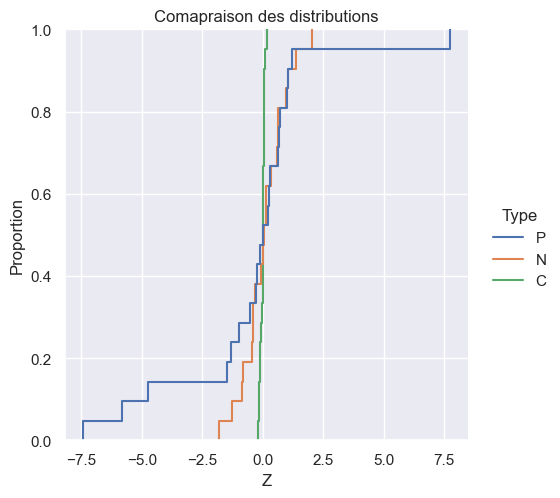

In [51]:
sns.set_theme()
sns.displot(data=da, kind='ecdf', x='Z', hue='Type')
plt.title('Comapraison des distributions')

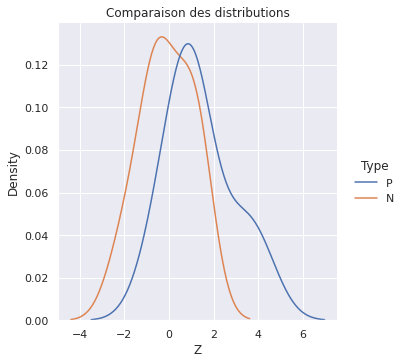

Text(0.5, 1.0, 'Comapraison des distributions')

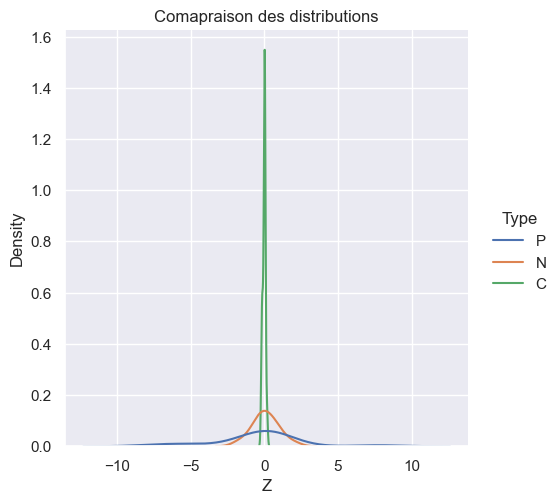

In [52]:
sns.set_theme()
sns.displot(data=da, kind='kde', x='Z', hue='Type')
plt.title('Comapraison des distributions')